In [87]:
# Setup, zapewnia czytelność całości - NIE MODYFIKOWAĆ
# URUCHOMIĆ JAKO PIERWSZE!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import random
import numpy as np

def pretty_print(text='text'):
    print('\n')
    print(text.upper(), end='\n---------------\n')

# Wstęp - co to, po co to

Skrypt ma służyć jako swego rodzaju "crash course" z zagadnień niezbędnych do pracy z danymi - czyli Python + najważniejsze biblioteki z ekosystemu (NumPy, Pandas, Matplotlib). Został przygotowany z myślą o studentach (przez studenta;), którzy potrafią programować (nie będzie tłumaczenia co robi if, for, while etc.), a po prostu nie mieli wcześniej styczności z Pythonem ani wspomnianymi bibliotekami. Może się przydać na początku takich przedmiotów jak m.in. Metody Numeryczne, Wstęp do analityki danych, Data Mining, PSAW, Wizualizacja Danych.

W skrócie, to co zostanie przedstawione to:
1. Python: składnia, lista, słownik, tuple+set
2. Numpy: ndarray, podstawowe mechanizmy działania
3. Pandas - Series, DataFrame - wybieranie danych, modyfikacja, przydatne sztuczki, szybkie plotowanie
4. Matplotlib - czym jest Figure, Axis, podstawy działania biblioteki, dwa podejścia do plotowania

Gdybyś miał jakiś pomysł co można by poprawić, albo zauważył jakiś błąd, to proszę o feedback! <b> aleksander.pugowski@student.uj.edu.pl </b>

# Python - wonsz to twój przyjaciel

Python - język niezwykle przyjazny początkującym, który stosunkowo szybko pozwala na robienie w nim naprawdę ciekawych rzeczy.
Obecnie jest to najpopularniejszy język na świecie (za TIOBE index), pokazujący swoje mocne strony szczególnie przy pracy z danymi, gdzie jest już standardem, tam gdzie Excel nie może.

Mimo tego, że łatwo sprawić aby program w Pythonie działał i spełniał swoje zadanie, nie można zapominać o wydajności. A ta może się diametralnie zmieniać w zależności od tego jak zapiszemy kod który efektywnie robi to samo. 

Przykład: powiedzmy że muszę wygenerować sekwencję liczb 1-10000. Zróbmy to na różne sposoby:

In [88]:
%%timeit 
# Konstrukcja w stylu C
numbers = []
for x in range(10000):
    numbers.append(x)

654 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [89]:
%%timeit
# Konstrukcja pythonowa, ale bez użycia dedykowanej biblioteki (czyli w sumie nie do końca pythonowa)
numbers = [x for x in range(10000)]

259 µs ± 2.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [90]:
%%timeit
# Konstrukcja z użyciem NumPy - wysoce zoptymalizowanej biblioteki numerycznej
numbers = np.arange(1, 10000, 1)

4.89 µs ± 55.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Zwróć uwagę na różnicę w czasie wykonania (jednostki!) - dla dociekliwych, gdybyśmy koniecznie musieli mieć to w formie listy, to przekonwertowanie np.array na liste dalej jest szybsze!

Lekcja z tego przykładu jest następująca - jeżeli masz przed sobą jakieś zadanie, to spędź trochę czasu na wybór odpowiedniego narzędzia - na 99% twój problem jest powszechnie spotykany i ktoś już pomyślał nad narzędziami, żeby to zoptymalizować (np. nad funkcją w jakiejś bibliotece, czy dedykowaną strukturą danych) - wykorzystanie go będzie zarówno wydajniejsze jak i bardziej odporne na bugi.

Jedną z głównych zalet Pythona jest jego przejrzysta składnia - nawet nie znając specyfiki języka można śledzić na bieżąco przykłady i (jeżeli ma się jakieś doświadczenie z programowaniem) orientować się co się dzieje. Poniżej przedstawiam trochę
prostego kodu, żebyś zobaczył/a jak to wygląda.

Polecam przejrzeć wbudowane funkcje Pythona - jest ich stosunkowo niewiele, a i tak raczej na co dzień korzysta się tylko z 
niektórych, szczególnie: abs(), enumerate(), getattr(), len(), castowanie, map(), min/max, sum(), zip(): 
https://docs.python.org/3/library/functions.html

In [91]:
# Tworzenie funkcji, jeden parametr pozycyjny, drugi keyword-argument - te muszą znajdować się PO pozycyjnych
def function(x, y=1):
    return x + y

# Tworzenie listy - podstawowa struktura danych, piekielnie użyteczna
example_list = ['a', 'b', 'c']

# Iterowanie po liście
pretty_print('Iterowanie po liscie')
for element in example_list:
    print(element)

# Często zdarza się tak, że chcemy mieć szybki dostęp zarówno do elementu jak i do indeksu - funkcja enumerate() świetnie 
# się do tego sprawdza
pretty_print('Funkcja enumerate:')
for index, element in enumerate(example_list):
    print(index, element)
    
# Funkcja range(start, stop*, step*):
pretty_print('Funkcja range(start, stop*, step*):')
for number in range(0, 11, 2):
    print(number)
    
# Wywołanie funkcji (np. funkcja pretty_print)
pretty_print('Wywołanie funkcji function(1) zwraca:')
print(function(1))

# Konwersja typów
pretty_print('konwersja typów:')
word = '12'
number = 10
print(number + int(word))
print(str(number) + word)
  
# Slicing - mechanizm dzialajacy podobnie jak range, tzn string[start_index:stop_index:step]
pretty_print('Slicing')
example_string = 'BardzoDlugiPrzykladowyString'
print(example_string[0:6])
print(example_string[6:11])
print(example_string[0:-5])
print(example_string[0:-1:2])
# odwracanie stringa
print(example_string[::-1])

# Mechanizm rozpakowywania
pretty_print('mechanizm rozpakowywania')
a, b, c = [1, 2, 3]
print(a, b, c)
# uwaga, to spowoduje błąd: 
# a, b, c, d = [1, 2, 3]

# Importowanie modułu wraz z nadaniem mu aliasu
pretty_print('importowanie modułu')
import numpy as np
print(np.linspace(0, 100, 10))




ITEROWANIE PO LISCIE
---------------
a
b
c


FUNKCJA ENUMERATE:
---------------
0 a
1 b
2 c


FUNKCJA RANGE(START, STOP*, STEP*):
---------------
0
2
4
6
8
10


WYWOŁANIE FUNKCJI FUNCTION(1) ZWRACA:
---------------
2


KONWERSJA TYPÓW:
---------------
22
1012


SLICING
---------------
Bardzo
Dlugi
BardzoDlugiPrzykladowyS
BrzDuiryldwSrn
gnirtSywodalkyzrPigulDozdraB


MECHANIZM ROZPAKOWYWANIA
---------------
1 2 3


IMPORTOWANIE MODUŁU
---------------
[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]


Żeby móc lepiej zrozumieć kod napisany w Pythonie, warto sobie uświadomić, że w Pythonie absolutnie wszystko jest obiektem - nawet najprostszy int. Pociąga to za sobą wiele konsekwencji, jak np. metody specjalne, o których nie ma miejsca żeby tutaj pisać (dla ciekawych: https://docs.python.org/3/reference/datamodel.html), warto natomiast wspomnieć o podstawowych funkcjach do badania zachowania języka i o rozróżnieniu obiektów na mutable i immutable.

Obiekty typu mutable mogą zmieniać swoją wartość podczas działania programu, immutable nie mogą - w pamięci tworzony jest nowy obiekt. Lista jest obiektem mutowalnym, a np. string - nie. Jak to zobaczyć?

In [92]:
# Funkcja id() zwraca adres pamięci danego obiektu, funkcja hex() konwertuje go na notacje 16tkową
example_list = [1, 2]
print(hex(id(example_list)))
example_list.append(3)
print(hex(id(example_list)))

print('-'*10)

example_str = 'python'
print(hex(id(example_str)))
example_str += 'java:<'
print(hex(id(example_str)))

# Badanie jakim obiektem jest dana zmienna
print('-'*10)
print(type(example_list))
print(type(example_str))

0x1f52276eb00
0x1f52276eb00
----------
0x1f51d1f1e30
0x1f526f0fef0
----------
<class 'list'>
<class 'str'>


Świetnym narzędziem do zrozumienia jak język działa pod maską jest: https://pythontutor.com/visualize.html#mode=edit

Poniżej trochę więcej kodu w Pythonie, żeby zaznajomić oczy ze składnią - co nie powinno (jak w przypadku niektórych innych języków - czytaj Java) być bardzo bolesne. Najszybszym sposobem na zapoznanie się ze składnią jest napisanie kilku prostych skryptów - do czego zachęcam, tutaj kilka pomysłów od ChataGPT:

A script that reads in a CSV file and calculates the average value of a particular column.
A script that prompts the user for a list of numbers and then calculates and prints their sum.
A program that reads in a text file and outputs the most frequently occurring word in the file.
A script that prompts the user for a string and then prints out whether it's a palindrome (reads the same backward as forward).
A program that simulates a game of Blackjack, allowing the user to play against the computer.
A program that simulates a game of Tic-Tac-Toe, allowing two players to take turns.

chodzi o to, żeby samemu poszukać jak wygląda konwersja typów, praca ze stringami itp.

Gdybys chciał/a podręczne źrodło z opisaną składnią to polecam: https://www.w3schools.com/python/default.asp

Polecam przed sprawdzeniem wyniku danej operacji zgadnąć, co się wydarzy - powinno to być dość intuicyjne.

In [93]:
some_list = [1, 2, 3, 4, 5]
some_string = "harrari"
some_dictionary ={"Python": True,
                  "Java": False,
                   "C#": None}
# Loopowanie 
pretty_print("Loopowanie")
for number in some_list:
    print(number)
print(" ")

for i in range(len(some_list)): # range(start=0, stop, step=1), len() zwraca dlugosc obiektu typu iterable
    print(some_list[i])
print(" ")

for letter in some_string: # string jest obiektem typu iterable!
    print(letter)
print(" ")

pretty_print("Dictionary")
if some_dictionary["Python"]:
    if not some_dictionary["Java"]:
        print(some_dictionary["C#"])

pretty_print("Rozpakowywanie")
python, java = ("cool", "not cool") # mechanizm "rozpakowywania" 
print(f"Python: {python}, Java: {java}") # f string - obecnie najlepsza praktyka gdy chcemy w stringu umiescic zmienne

for key, value in some_dictionary.items():
    print(key, " -> ", value)
    
# Pusty iterable jest traktowany jako wartość false
example = some_list.copy()
while example:
    example.pop()
print("all empty now!")

# Stringi
pretty_print("Stringi")

test = "KonczaMiSiePomyslyNaNazwy"

# slicing - od tylu numerowanie od -1, od przodu od 0 
print(test[11:18])
print(test[:6])
print(test[6:-17])
print(test[-17:-14])

print(test.upper())
print("Nie" + test)
print(test * 2)

def add_comas(text: str) -> str:
    """ Adds comma after separate words in CammelCase"""
    result = ""
    for index, letter in enumerate(text[:-1]):
        result += letter
        if letter.islower() and text[index+1].isupper():
            result += ","
    return result + text[-1]

print(add_comas(test))
test_with_commas = add_comas(test)
print(test_with_commas.split(sep=",")) # rozdziela string na liste po zadanym separatorze, domyslnie spacja



LOOPOWANIE
---------------
1
2
3
4
5
 
1
2
3
4
5
 
h
a
r
r
a
r
i
 


DICTIONARY
---------------
None


ROZPAKOWYWANIE
---------------
Python: cool, Java: not cool
Python  ->  True
Java  ->  False
C#  ->  None


5

4

3

2

1

all empty now!


STRINGI
---------------
Pomysly
Koncza
Mi
Sie
KONCZAMISIEPOMYSLYNANAZWY
NieKonczaMiSiePomyslyNaNazwy
KonczaMiSiePomyslyNaNazwyKonczaMiSiePomyslyNaNazwy
Koncza,Mi,Sie,Pomysly,Na,Nazwy
['Koncza', 'Mi', 'Sie', 'Pomysly', 'Na', 'Nazwy']


## Lista - (prawie) wszędzie się nada

Lista w Pythonie to zdecydowanie najwszechstronniejsza i najpopularniejsza struktura danych. Gdy nie musimy dbać o jak najwiekszą wydajność kodu (tak, deque z klasy collections umozliwia szybsze dodawanie/usuwanie elementu z przodu i z tylu, a set umozliwia szybsze sprawdzenie zawierania elementu - pytanie czy to zawsze ma znaczenie) to lista powinna być pierwszym containerem który przychodzi na myśl. Komplementarny do niej będzie dictionary (tablica haszująca), o którym więcej w następnym podpunkcie.

In [94]:
# Tworzenie 
example = []
example = list()
example = [4, 8, 7, 6, 1]

# Najważniejsze metody
pretty_print("metody")
example.append("inny typ zeby pokazac ze mozna - bo w pythonie wszystko jest obiektem!")
print(example)
example.remove(8)
print(example)
print(f"7 occurs {example.count(7)} times")
# Posortowanie teraz wywola blad - nie wie jak porownac int i str. 
# Solve: modyfikacja klucza porownywania: funkcja podana jako key zostanie zastosowana do kazdego elementu przed porownaniem
# example.sort()
example.sort(key=lambda x: float("inf") if isinstance(x, str) else x) # zwroci inf jezeli natrafi na stringa
print(example)

# Indexing and slicing - analogicznie jak ze stringami
pretty_print("Indexing and slicing")
list_from_string = list("DlugiString") # moge tak zrobic, bo string jest typu iterable!
print(list_from_string[5:11])
print(list_from_string[5:10:2])
print(list_from_string[::2])
print(list_from_string[::-1]) # fajna sztuczka alert - odwrocenie listy - robie krok z dlugoscia -1 przez cala liste

# BARDZO PYTHONOWY FRAGMENT - list comprehension
# Mechanizm umozliwiajacy tworzenie nowych list na podstawie innych obiektow typu iterable - technicznie pozwala tez na inne 
# rozne rzeczy, ale jej zastosowanie powinno sie ograniczac do tego, tak przynajmniej twierdzi Pan Brett Slatkin w książce  
# Efektywny Python - i ja mu wierze
pretty_print("list comprehension")

numbers = [1, 2, 3, 4]
numbers_squared = [num*num for num in numbers]

more_numbers = [x for x in range(10)]
print(more_numbers)
odd_numbers = [num for num in more_numbers if num % 2 == 0]
print(odd_numbers)
# Przyklad zlego uzycia
[print("i wont do that") for x in range(10)] # dziala, ale slaba praktyka

# Wbudowane funkcje a listy
pretty_print("funkcje wbudowane")
print(sum(numbers))
print(len(numbers))
print(min(numbers))
print(max(numbers))

# Iterowanie przez dwie listy jednoczesnie - az nie wyczerpia sie elementy w krotszej liscie!
for x, y in zip(numbers, numbers_squared):
    print(f"num: {x} ^2 -> {y}")

# Listy zagniezdzone - w praktyce lepiej uzywac macierzy w numpy lub dataframe w pandas
pretty_print("Listy zagniezdzone")
a_list_in_a_list = [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
print(f"Element w 2 rzedzie i 3 kolumnie: {a_list_in_a_list[1][2]}")

# Kopiowanie list - uwaga na przypadkowy aliasing!
pretty_print("Kopiowanie list")
first = [1, 2, 3, 4, 5, 6, 7]
second = first
second[0] += 100
print(first)
# w tym przypadku, zmienna second to tylko referencja do listy first - nic dziwnego wiec za ja modyfikuje. Stworzmy kopie
second = first.copy()
second[1] += 100
print(first)
print(second)

# Inne przydatne rzeczy
# usuwanie duplikatów z listy poprzez castowanie na set- uwaga, NIE zachowuje kolejności
pretty_print("Usuwanie duplikatów")
duplicates = [1, 1, 1, 1, 2, 3]
no_duplicated = set(duplicates) 
print(no_duplicated)

# programowanie funkcyjne - map na liscie - efektywnie to samo co list comprehension, ale WOLNIEJSZE
pretty_print("map")
numbers = [1, 2, 3, 4]
numbers_squared = list(map(lambda x: x*x, numbers))
print(numbers_squared)

# Sprawdzanie czy element jest w liscie
pretty_print("x in [x, y]")
if 1 in [1, 2]:
    print("Jest.")
    
# Zliczanie elementow w liscie 
pretty_print("Zliczanie")
from collections import Counter
result = Counter([1, 1, 1, 1, 4, 4, 4, 6, 7, 8])
print(result)




METODY
---------------
[4, 8, 7, 6, 1, 'inny typ zeby pokazac ze mozna - bo w pythonie wszystko jest obiektem!']
[4, 7, 6, 1, 'inny typ zeby pokazac ze mozna - bo w pythonie wszystko jest obiektem!']
7 occurs 1 times
[1, 4, 6, 7, 'inny typ zeby pokazac ze mozna - bo w pythonie wszystko jest obiektem!']


INDEXING AND SLICING
---------------
['S', 't', 'r', 'i', 'n', 'g']
['S', 'r', 'n']
['D', 'u', 'i', 't', 'i', 'g']
['g', 'n', 'i', 'r', 't', 'S', 'i', 'g', 'u', 'l', 'D']


LIST COMPREHENSION
---------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that
i wont do that


[None, None, None, None, None, None, None, None, None, None]



FUNKCJE WBUDOWANE
---------------
10
4
1
4
num: 1 ^2 -> 1
num: 2 ^2 -> 4
num: 3 ^2 -> 9
num: 4 ^2 -> 16


LISTY ZAGNIEZDZONE
---------------
Element w 2 rzedzie i 3 kolumnie: 3


KOPIOWANIE LIST
---------------
[101, 2, 3, 4, 5, 6, 7]
[101, 2, 3, 4, 5, 6, 7]
[101, 102, 3, 4, 5, 6, 7]


USUWANIE DUPLIKATÓW
---------------
{1, 2, 3}


MAP
---------------
[1, 4, 9, 16]


X IN [X, Y]
---------------
Jest.


ZLICZANIE
---------------
Counter({1: 4, 4: 3, 6: 1, 7: 1, 8: 1})


## Dictionary and tuple

Mimo jej wszechstronności, za pomocą listy nie da się zrobić wszystkiego. Druga najczęściej stosowaną strukturą danych jest Dictionary (słownik), czyli zwykła tablica haszująca. Warto wiedzieć co nieco również o tuples - krotkach, o których można myśleć jak o niemodyfikowalnych listach - co niesie za sobą pewne korzyści.

In [95]:
# Tworzenie dict
number_to_string = {1: "one",
                   2: "two",
                   3: "three"}

number_to_string.update({4: "four"})

# Loopowanie 
pretty_print("loopowanie")
for key in number_to_string.keys():
    print(key)
    
for value in number_to_string.values():
    print(value)

for key, value in number_to_string.items():
    print(key, value)

# Dostęp do elementu
pretty_print("dostep do wartosci")
for key in number_to_string.keys():
    print(number_to_string[key])

# Dostep do nieistniejacego elementu = blad
try:
    number_to_string["two hundred"]
except KeyError:
    print("Przy okazji przemycam klauzule try-except")
    
# Zmiana wartosci klucza
number_to_string[1] = "seven"
print(number_to_string[1])
# Naprawmy
number_to_string[1] = "one"

pretty_print("dict comprehension")
# Dict comprehension - analogicznie do list comprehension
comp_dict = {key*key: value+" squared" for key, value in number_to_string.items()}
print(comp_dict)

    



LOOPOWANIE
---------------
1
2
3
4
one
two
three
four
1 one
2 two
3 three
4 four


DOSTEP DO WARTOSCI
---------------
one
two
three
four
Przy okazji przemycam klauzule try-except
seven


DICT COMPREHENSION
---------------
{1: 'one squared', 4: 'two squared', 9: 'three squared', 16: 'four squared'}


In [96]:
# Tworzenie tuples
first = 1, 2, 3
second = (1, 2, 3)
print(first == second)

# Dostep do elementu
print(first[2])
print(second[0])

# Niemodyfikowalne!
try:
    first[0] = 5
except TypeError:
    print("No przeciez pisze ze sie nie da")
    
# Po co uzywac tupli? 
# 1) Przez niemodyfikowalnosc sa hashowalne - a wiec moga sluzyc np. jako klucz do slownika
# 2) Jezeli jakies dane nie beda sie zmieniac to tuple jest dobrym pomyslem
# 3) Iterowanie po tuplach jest szybsze niz po listach - znowu, jesli dane sie nie zmieniaja, to po co przeplacac?


# Rozpakowywanie tuples
one, two, three = (1, 2, 3)
print(one, two, three)

True
3
1
No przeciez pisze ze sie nie da
1 2 3


Oczywiscie to tylko wybrane zagadnienia z Pythona, ale do pracy z danymi powinno wystarczyc - na pewno w zakresie wymaganym do wszystkich tych kursów, które wymieniłem na początku skryptu, a też dodałem co nieco ponadto.

Źródła które polecam:
 * dokumentacja Pythona : https://docs.python.org/3/
 * Efektywny Python aut. Brett Slatkin
 * Fluent Python aut. Luciano Ramalho - tutaj dopiero zaczynam, ale wydaje sie byc bardzo porządnie napisana

## Ćwiczenia 
Podaję kilka przykładowych ćwiczeń (takich na które ja kiedyś natrafiłem i odkryłem przy nich coś nowego), ze świadomością, że ilość dostępnego materiału w internecie po wpisaniu "Python List Exercises" jest tak duża, że na pewno każdy znajdzie coś dla siebie. 

Tak swoją drogą, to do nauki pracy ze strukturami danych dobrze się sprawdzają stronki typu HackerRank, LeetCode, CodeWars etc., tym bardziej, że bardzo często podobne zadania trafiają się potem na rozmowach rekrutacyjnych (CODILITIY!). Polecam.

Rozwiązania na spokojnie można znaleźć w internecie.

Tam gdzie to możliwe, używaj list comprehension, ale nie zapominaj, że czytelność >> jednolinijkowość !

* ex1. Wybierz z listy tylko elementy podzielne przez 3 i przez 7, a na miejsce tych niepodzielnych wpisz 0
* ex2. Posortuj listę po drugim elemencie tupli.
* ex3. Napisz funkcję sprawdzającą czy lista zawiera daną podlistę.
* ex4. Napisz funkcję zwracającą słownik z policzonymi wystąpieniami wszystkich elementów z listy (element:ilosc wystapien)
* ex5. Napisz program usuwający powtórzenia z listy, ale zachowujący kolejność elementów

In [97]:
ex1 = [3, 3, 3, 0, 1, 2, 3, 7, 7, 21, 241, 12, 4, 6, 9, 441]
ex2 = [(1, 2), (2, 3), (1, 1), (1, 5), (1, 8), (1, 0), (1, 2)]

# Numpy - jeden by wszystkimi  rządzić

Numpy to wysoce zoptymalizowana biblioteka numeryczna do Pythona, która jest podstawą wielu innych bibliotek (Pandas, SciPy, scikit-learn, Matplotlib i wiele wiele innych). Dostarcza struktury danych które pozwalają na pracę z liczbami z prędkością bardziej zbliżoną do C niż do Pythona - najważniejszą z nich jest ndarray - wielowymiarowa tablica liczb.

Dlaczego numpy jest szybki? Duża część kodu numpy została napisana w C i jest dołączona w skompilowanej formie - tak więc loopowanie nie odbywa się w Pythonie, tylko w C - działamy więc na bazowych typach (int to sekwencja bitów, a nie obiekt). To wszystko dzieje się "pod maską" - dzięki temu możemy pisać kod zwinnie jak w Pythonie, który wykonuje się wydajnie niemalże jak w C. Oczywiście niesie to za sobą pewne ograniczenia - tablice mogą zawierać w sobie elementy jednego typu, a ich rozmiary nie mogą dynamicznie rosnąć - warto o tym pamiętać.


## Ndarray - where all the magic happens


In [98]:
# konwencja nazewnictwa biblioteki w kodzie
import numpy as np

# tworzenie ndarrays
array1 = np.array([x for x in range(1, 11)]) # poprzez konwersje typu wbudowanego Pythona
array2 = np.array([x for x in range(1, 11)], dtype=np.float64) # jezeli chce, to moge narzucic typ danych w array
array3 = np.arange(1, 10, 1) # poprzez funkcje arange, argumenty anal. jak range() tzn start*, stop, step
array4 = np.ones((4, 4)) # tablica o wymiarach 4x4 wypelniona jedynkami - ARGUMENTEM JEST TUPLE
array5 = np.linspace(1, 100, 20) # podaje granice mojej przestrzeni liniowej (1-100) i ile chce punktow z tego przedzialu 
                                # oczywiscie punkty sa rownomiernie rozlozone - bardzo przydatne przy plotowaniu
pretty_print('array1')    
print(array1)
pretty_print('array2')  
print(array2)
pretty_print('array3')  
print(array3)
pretty_print('array4')  
print(array4)
pretty_print('array5')  
print(array5)


# Atrybuty ndarray - samo ndarray jest obiektem (bo tutaj jesteśmy na poziomie Pythona)
pretty_print('array 4 attributes')  
print('shape: ', array4.shape)
print('size: ', array4.size)
print('ndim: ',array4.ndim)
print('dtype: ',array4.dtype)



ARRAY1
---------------
[ 1  2  3  4  5  6  7  8  9 10]


ARRAY2
---------------
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


ARRAY3
---------------
[1 2 3 4 5 6 7 8 9]


ARRAY4
---------------
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


ARRAY5
---------------
[  1.           6.21052632  11.42105263  16.63157895  21.84210526
  27.05263158  32.26315789  37.47368421  42.68421053  47.89473684
  53.10526316  58.31578947  63.52631579  68.73684211  73.94736842
  79.15789474  84.36842105  89.57894737  94.78947368 100.        ]


ARRAY 4 ATTRIBUTES
---------------
shape:  (4, 4)
size:  16
ndim:  2
dtype:  float64


Wybieranie elementów tablicy odbywa się analogicznie do slicingu list w Pythonie


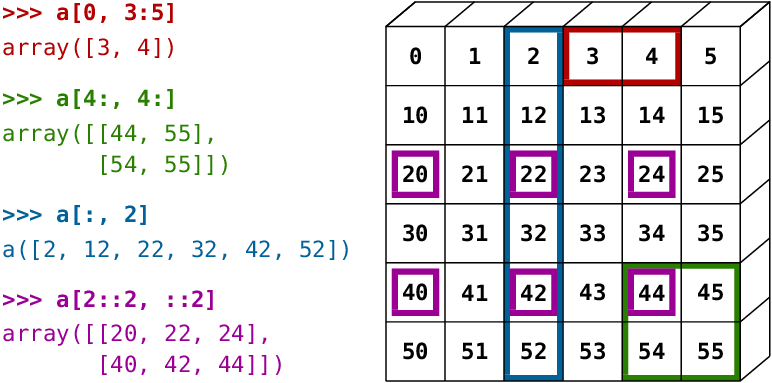

In [99]:
# Operacje na ndarrays są WEKTORYZOWANE i BROADCASTOWANE - co to znaczy?

# Wektoryzacja to po prostu ukrycie for loopow, ktorych bysmy normalnie potrzebowali do wykonania operacji na tablicach element
# po elemencie - to nie tak, że ich nie ma, po prostu zostały napisane w języku C i są przed nami ukryte. Przykład
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

pretty_print('efekt arr1 + arr2 - nie potrzebowalismy zadnego for loopa')
print( arr1 + arr2 )

# Broadcastowanie oznacza natomiast mechanizm konwersji który numpy stosuje pod maską w przypadku niezgodności wymiarów obiektów
# na których chcemy wykonać operację - najprościej będzie zobaczyć jak to działa

pretty_print('broadcasting - rozszerzanie')
print( arr1 + 2 )
print( arr2 * 5)

# Jak widzimy, 2 zostało rozszerzone tak jakby było tablicą [2, 2, 2] - oczywiście to tylko pomysł, faktyczne rozszerzanie 
# byłoby niewydajne, ale efekt jest ten sam

pretty_print('broadcasting - konwersja wymiarow')
arr3 = np.array([[1], [2], [3]])
print('arr3: ')
print(arr3)
print()
arr4 = np.array([1, 2, 3])
print('arr4: ', arr4)
print()
print('suma: ')
print(arr3 + arr4)

# Co tu sie wydarzylo? Kazalismy dodac do siebie wektor o wymiara 1x3 z wektorem o wymiarach 3x1 - oba zostaly wiec 
# ZBROADCASTOWANE (?) - wektor [1, 2, 3] -> [[1, 2, 3], [1, 2, 3], [1, 2, 3]], a wektor
# [[1], [2], [3]] -> [[1, 1, 1], [2, 2, 2], [3, 3, 3]]

# Zasady broadcastowania są bardzo dobrze przedstawione w oficjalnej dokumentacji (z wizualnym przedstawieniem) - bardzo 
# zachęcam do korzystania, bo będzie to tak samo działało w innych bibliotekach (bo te są przecież zbudowane na numpy) - a 
# przynajmniej być świadomym, że taki mechanizm istnieje i że trzeba o nim pamiętać
# https://numpy.org/doc/stable/user/basics.broadcasting.html



EFEKT ARR1 + ARR2 - NIE POTRZEBOWALISMY ZADNEGO FOR LOOPA
---------------
[5 7 9]


BROADCASTING - ROZSZERZANIE
---------------
[3 4 5]
[20 25 30]


BROADCASTING - KONWERSJA WYMIAROW
---------------
arr3: 
[[1]
 [2]
 [3]]

arr4:  [1 2 3]

suma: 
[[2 3 4]
 [3 4 5]
 [4 5 6]]


In [100]:
# Reshaping array

shape1 = np.arange(0, 100, 1)
print(shape1)
print()
print(shape2 := shape1.reshape(10, 10))
print()
print(shape2.flatten())
print()
print(shape2.transpose())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

[[ 0 10 20 30 40 50 60 70 80 90]
 [ 1 11 21 31 41 51 6

In [101]:
# Merging arrays
arr1 = np.arange(1, 11, 1)
arr2 = np.arange(11, 1, -1)
print(arr1, arr2)
print()
print(np.concatenate((arr1, arr2)))
print()
print(np.stack((arr1, arr2)))
print()
print(np.stack((arr2, arr1)))

[ 1  2  3  4  5  6  7  8  9 10] [11 10  9  8  7  6  5  4  3  2]

[ 1  2  3  4  5  6  7  8  9 10 11 10  9  8  7  6  5  4  3  2]

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 10  9  8  7  6  5  4  3  2]]

[[11 10  9  8  7  6  5  4  3  2]
 [ 1  2  3  4  5  6  7  8  9 10]]


Oczywiście Numpy dostarcza też masę przydatnych funkcji do podstawowych (ale i bardziej wymyślnych) operacji - i należy z nich korzystać! Ręczne loopowanie powinno być ostatecznością - kiedy naprawdę nie ma funkcji, która rozwiązuje nasz problem.

In [102]:
arr1 = np.linspace(1, 100, 10**5)

In [103]:
%%timeit 

arr1.sum()

34.6 µs ± 594 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [104]:
%%timeit
sum = 0
for element in arr1:
    sum += element

8.51 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [105]:
# Bardzo przydatną sztuczką do wybierania danych elementów szybko jest podawania wektora booleanów, jako indeksu do tablicy -
# więcej o tym będzie przy Pandas, ale juz tutaj pokażę jak to działa

arr1 = np.random.randint(100, size=50)
print(arr1)
print()
print(arr1[arr1 > 50]) 
print()
# Jak to działa?
print(arr1 > 50)
# Czyli jest to rownoznancze z podaniem  arr1[True, False, True, ...] - i wybiera oczywiscie tylko elementy odpowiadajace True

[ 5 24 10 52 52 58 90 39 68 76 28  3 27 91 39 28 14 71 67 33 54 94 59 34
  0 46 10 93 44 41 78 86 83 13 80 23 22 98 27 11 79 15 40 69 48 24 20 38
 85 99]

[52 52 58 90 68 76 91 71 67 54 94 59 93 78 86 83 80 98 79 69 85 99]

[False False False  True  True  True  True False  True  True False False
 False  True False False False  True  True False  True  True  True False
 False False False  True False False  True  True  True False  True False
 False  True False False  True False False  True False False False False
  True  True]


Myślę, że tyle informacji na temat numpy wystarczy do efektywnej pracy z danymi. Z samego interfejsu numpy nie korzysta się aż tak często, za wyjątkiem generowania tablic - jednak zasady którymi rządzą się ndarrays w numpy są przenoszone na wiele innych bibliotek, dlatego trzeba o nich pamiętać.

Numpy oferuje też wyspecjalizowane funkcje do statystyki czy algebry liniowej - zainteresowanych odsyłam do dokumentacji.
Przydatne linki:
* https://numpy.org/doc/stable/user/index.html
* https://numpy.org/doc/stable/reference/index.html

Gdybyś chciał/a poćwiczyć, to tutaj są pomysły na krótkie ćwiczenia:

Ćwiczenie 2: Manipulacja tablicami

Utwórz jednowymiarową tablicę losowych liczb całkowitych.<br />
Posortuj tablicę w kolejności malejącej. <br />
Odwróć kolejność elementów w tablicy.<br />
Usuń wszystkie powtarzające się elementy z tablicy.<br />
Wytnij środkowy fragment tablicy o długości 5.<br />

Ćwiczenie 3: Praca z macierzami

Utwórz dwie macierze dwuwymiarowe o takich samych wymiarach.<br />
Oblicz sumę tych dwóch macierzy.<br />
Oblicz iloczyn macierzy.<br />
Oblicz transpozycję jednej z macierzy.<br />
Oblicz wyznacznik jednej z macierzy.<br />
Oblicz odwrotność drugiej macierzy.<br />

Ćwiczenie 4: Generowanie danych losowych

Utwórz tablicę o rozmiarze 10x10 wypełnioną losowymi liczbami z zakresu od 0 do 1.<br />
Wygeneruj losowy wektor o długości 100 z wartościami z rozkładu normalnego.<br />
Wygeneruj losową macierz o rozmiarze 5x5 z liczbami całkowitymi z zakresu od 1 do 10.<br />
Zamień kolejność wierszy w macierzy.<br />

Ćwiczenie 5: Indeksowanie i filtrowanie danych

Utwórz jednowymiarową tablicę z wartościami od 0 do 9.<br />
Wybierz tylko parzyste liczby z tablicy.<br />
Znajdź wszystkie indeksy, gdzie wartość w tablicy jest większa niż 5.<br />
Utwórz tablicę losowych liczb całkowitych i wybierz tylko te liczby, które są podzielne przez 3.<br />

# Pandas - pandy, wszędzie pandy

Pandas to biblioteka do obróbki danych której chociażby podstawowa znajomość jest konieczna przy pracy z danymi w Pythonie. 
Gdy ma się do czynienia z danymi tabelarycznymi, Pandas to zawsze dobry pomysł. Najważniejsza struktura danych, która odpowiada
za większość funkcjonalności biblioteki to **DataFrame**, na którego poznanie warto poświęcić czas.

DataFrame to 2-wymiarowa tabela z danymi, która może przechowywać dane różnych typów - podobne do tabelki w Excelu czy SQL.
Jej działanie najłatwiej będzie pokazywać na przykładach - wykorzystam popularny dataset dotyczący sprzedaży domów.

Przy przechodzeniu przez kolejne komórki, dobrym pomysłem będzie znajdowanie użytych metod w dokumentacji i doczytywanie o ich
parametrach - zazwyczaj jest ich dużo i pozwalają dostosować zachowanie metody pod swój cel, co potem oszczędza sporo czasu.

Zobaczmy jak prezentuje się DataFrame wczytany z pliku csv: 

In [114]:
import pandas as pd # importuje biblioteke, pd to popularna konwencja na alias dla pandas

# Wycztuję plik csv (comma separated values) jako dataframe i zapisuje go pod zmienną data
data = pd.read_csv('https://raw.githubusercontent.com/Pug0r/University/main/Introduction%20to%20Data%20Science%20%5BWprowadzenie%20do%20analityki%20danych%5D/house_train.csv', index_col=[0])

# Jak widac, typ zmiennej data to DataFrame
print(type(data))

# Wyswietlam (domyslnie 5) pierwszych rzedow z tabeli
data.head()

<class 'pandas.core.frame.DataFrame'>


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14136,8077200360,20141112T000000,557865.0,4,2.50,3030,6813,2.0,0,0,...,9,3030,0,1987,0,98074,47.6296,-122.029,2310,8682
20699,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,0,...,7,2233,0,2012,0,98001,47.2599,-122.256,1544,6036
17835,9406510040,20150206T000000,555000.0,4,2.50,2920,24074,2.0,0,0,...,9,2920,0,1997,0,98038,47.3810,-122.056,2760,26023
5603,7224000545,20140825T000000,370000.0,4,3.00,2130,4838,1.5,0,0,...,7,2130,0,1930,0,98055,47.4871,-122.203,1070,4838
15743,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170


Uwaga na problemy związane z wczytywaniem pliku! Nie każdy plik csv jest gotowy do prostego wczytania - np. pandas domyślnie traktuje pierwszy wiersz jako nagłówek, a domyślnym separatorem jest ',' - ale dane mogą pochodzić z różnych źródeł i być formatowane w różny sposób - jeśli po wczytaniu pliku całość wygląda kryptycznie, spróbuj najpierw powalczyć z opcjami funkcji read_csv (np. sep, header etc.)

Wspomniałem juz, że DataFrame to najważniejsza struktura w Pandas - to prawda, ale nie oznacza to, że jest to struktura najprostsza. 
DataFrame składa się z kolumn, a każda taka kolumna to **Series** - najprostsza struktura danych w Pandas, która jest indeksowaną tablicą (array) jednowymiarową. Indeksowanie oznacza tyle, że można de facto z niej korzystać jak ze słownika w Pythonie (mamy jednoznaczne przyporządkowanie index : wartość).

In [115]:
# Tworzenie Series
pretty_print('Tworzenie Series')
numbers = [x for x in range(5)]
indexes = [x for x in 'abcde']
series = pd.Series(numbers, index=indexes)

print(type(series))
print(series)

# Działa jak słownik
pretty_print('Działa jak słownik')
print(series['b'])

# Działa jak array
pretty_print('Działa jak array')
print(series[3])

# Każda kolumna z DataFrame to Series 
pretty_print('Każda kolumna z DataFrame to Series')
print(data['price'])



TWORZENIE SERIES
---------------
<class 'pandas.core.series.Series'>
a    0
b    1
c    2
d    3
e    4
dtype: int64


DZIAŁA JAK SŁOWNIK
---------------
1


DZIAŁA JAK ARRAY
---------------
3


KAŻDA KOLUMNA Z DATAFRAME TO SERIES
---------------
14136    557865.0
20699    317500.0
17835    555000.0
5603     370000.0
15743    700000.0
           ...   
3379     415000.0
5125     540000.0
2745     810000.0
11545    357500.0
21199    427005.0
Name: price, Length: 17290, dtype: float64


Warto zwrócic uwagę na fakt, że mimo zdolności przechowywania różnych typów w Series, POJEDYŃCZY obiekt Series może przechowywać tylko jeden konkretny typ - to ograniczenie wynika z faktu, że Pandas jest wysoce optymalizowany pod wydajność. Dzięki przechowywaniu danych tego samego typu można oszczędzić zarówno miejsce w pamięci jak i przyśpieszyć wykonywanie operacji dzięki *wektoryzacji* - czyli wykonywaniu operacji na tabeli jako na całości, zamiast na loopowaniu przez poszczególne elementy, co jest o wiele szybsze. Działanie dobrze prezentuje prosta operacja: 

In [116]:
series * 2

a    0
b    2
c    4
d    6
e    8
dtype: int64

**DataFrame** można stworzyć od zera na wiele różnych sposobów, podając jako argument konstruktora: dictionary, dictionary of Series, dictionary of arrays, dictionary of lists etc. - działanie jest dość intuicyjne:

In [117]:
pd.DataFrame({'example': [1, 2, 3], 'to': [4, 5, 6], 'prove': [7, 8, 9]})

,example,to,prove
0,1,4,7
1,2,5,8
2,3,6,9


W praktyce DataFrame często dostajemy już częściowo utworzony (np. poprzez wczytanie danych z pliku csv czy z jakiejś bazy danych), przez co kluczowe staje się sprawne wybieranie interesujących nas danych. Odbywa się to na zasadach podobnych do wybierania elementu ze słownika oraz na powszechnie stosowanym w Pythonie mechaniźmie slicingu:

In [121]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14136,8077200360,20141112T000000,557865.0,4,2.50,3030,6813,2.0,0,0,...,9,3030,0,1987,0,98074,47.6296,-122.029,2310,8682
20699,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,0,...,7,2233,0,2012,0,98001,47.2599,-122.256,1544,6036
17835,9406510040,20150206T000000,555000.0,4,2.50,2920,24074,2.0,0,0,...,9,2920,0,1997,0,98038,47.3810,-122.056,2760,26023
5603,7224000545,20140825T000000,370000.0,4,3.00,2130,4838,1.5,0,0,...,7,2130,0,1930,0,98055,47.4871,-122.203,1070,4838
15743,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170


In [122]:
# Wybranie pojedyńczej kolumny - jak wspominałem, pojedyńcza kolumna w df to Series - to ten obiekt zostanie więc zwrócony
pretty_print('Wybranie pojedyńczej kolumny')
print(type(data['price']))
data['price']

# Wybieranie kilku kolumn - rezultatem jest słownik Series, czyli DataFrame
pretty_print('Wybieranie kilku kolumn - rezultatem jest zbiór Series, czyli DataFrame')
print(type(data[['price', 'bedrooms', 'sqft_living']])) # UWAGA: zwróć uwagę na podwójne [] - nie podajesz pojedyńczego indeksu,
data[['price', 'bedrooms', 'sqft_living']]                                                              # tylko listę indeksów! 

# Wybranie pojedyńczego wiersza poprzez podanie nazwy
pretty_print('Wybranie pojedyńczego wiersza poprzez podanie nazwy')
data.loc[20699] 

# poprzez podanie numeru wiersza (w tym przypadku jest to tożsame)
pretty_print('Wybranie pojedyńczego wiersza poprzez podanie numeru wiersza (w tym przypadku jest to tożsame)')
data.iloc[1]

# poprzez slicowanie - dodatkowo wybrałem tylko kolumne price i sqft_living, dla przejrzystości (i pokazania, że można)
pretty_print('Wybranie pojedyńczego wiersza poprzez slicowanie')
data[1:11][['price', 'sqft_living']]

# poprzez podanie tablicy booleans - WAŻNY ELEMENT, przydatny potem przy filtrowaniu danych
pretty_print('Wybranie pojedyńczego wiersza poprzez podanie tablicy booleans')
data[[random.choice([True, False]) for _ in range(len(data))]]
# Co tu się wydarzyło? Tworzę listę losowo wypełnioną True/False o długości odpowiadającej ilości rekordów (wierszy) w DataFrame
# dzięki temu wybiera niektóre wiersze (te na które przypada wartość True), a resztę odrzuca.
# Kiedy to się przydaje? przykład: odfiltrować tylko domy o cenie powyżej 1000000:  data[data['price'] > 1000000]
# wytłumaczenie: data['price'] > 1000000 jest zamieniane w Series booli w zależności od wartości w każdym rekordzie



WYBRANIE POJEDYŃCZEJ KOLUMNY
---------------
<class 'pandas.core.series.Series'>


14136    557865.0
20699    317500.0
17835    555000.0
5603     370000.0
15743    700000.0
           ...   
3379     415000.0
5125     540000.0
2745     810000.0
11545    357500.0
21199    427005.0
Name: price, Length: 17290, dtype: float64



WYBIERANIE KILKU KOLUMN - REZULTATEM JEST ZBIÓR SERIES, CZYLI DATAFRAME
---------------
<class 'pandas.core.frame.DataFrame'>


,price,bedrooms,sqft_living
14136,557865.0,4,3030
20699,317500.0,4,2233
17835,555000.0,4,2920
5603,370000.0,4,2130
15743,700000.0,4,2420
...,...,...,...
3379,415000.0,3,1910
5125,540000.0,3,2100
2745,810000.0,3,2870
11545,357500.0,3,2080




WYBRANIE POJEDYŃCZEGO WIERSZA POPRZEZ PODANIE NAZWY
---------------


id                     629650030
date             20150312T000000
price                   317500.0
bedrooms                       4
bathrooms                    2.5
sqft_living                 2233
sqft_lot                    6025
floors                       2.0
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  2233
sqft_basement                  0
yr_built                    2012
yr_renovated                   0
zipcode                    98001
lat                      47.2599
long                    -122.256
sqft_living15               1544
sqft_lot15                  6036
Name: 20699, dtype: object



WYBRANIE POJEDYŃCZEGO WIERSZA POPRZEZ PODANIE NUMERU WIERSZA (W TYM PRZYPADKU JEST TO TOŻSAME)
---------------


id                     629650030
date             20150312T000000
price                   317500.0
bedrooms                       4
bathrooms                    2.5
sqft_living                 2233
sqft_lot                    6025
floors                       2.0
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  2233
sqft_basement                  0
yr_built                    2012
yr_renovated                   0
zipcode                    98001
lat                      47.2599
long                    -122.256
sqft_living15               1544
sqft_lot15                  6036
Name: 20699, dtype: object



WYBRANIE POJEDYŃCZEGO WIERSZA POPRZEZ SLICOWANIE
---------------


,price,sqft_living
20699,317500.0,2233
17835,555000.0,2920
5603,370000.0,2130
15743,700000.0,2420
14908,234999.0,1330
21235,679990.0,3320
21440,440000.0,1270
20941,336000.0,1260
15844,251000.0,1220
21282,706000.0,2510




WYBRANIE POJEDYŃCZEGO WIERSZA POPRZEZ PODANIE TABLICY BOOLEANS
---------------


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20699,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,0,...,7,2233,0,2012,0,98001,47.2599,-122.256,1544,6036
5603,7224000545,20140825T000000,370000.0,4,3.00,2130,4838,1.5,0,0,...,7,2130,0,1930,0,98055,47.4871,-122.203,1070,4838
21235,5727500006,20150427T000000,679990.0,4,2.75,3320,8653,2.0,0,0,...,8,3320,0,2014,0,98133,47.7521,-122.334,2140,8727
15844,8039900086,20140509T000000,251000.0,3,1.75,1220,7250,1.0,0,0,...,7,1220,0,1962,0,98045,47.4887,-121.784,1700,15251
13579,7266200085,20150325T000000,780000.0,5,1.75,2330,3800,1.5,0,0,...,7,1360,970,1927,0,98115,47.6835,-122.308,2100,3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
1937,2926069062,20140811T000000,840000.0,3,2.50,3050,33920,1.0,0,0,...,8,3050,0,2004,0,98052,47.7034,-122.072,1970,60984
7870,7203100120,20140616T000000,680000.0,4,2.75,2500,4950,2.0,0,0,...,8,2500,0,2010,0,98053,47.6964,-122.017,2500,4950
5125,3741600020,20140915T000000,540000.0,3,2.25,2100,20018,1.0,0,4,...,8,1470,630,1948,0,98166,47.4544,-122.366,2410,17196


In [123]:
data['price'] > 1000000

14136    False
20699    False
17835    False
5603     False
15743    False
         ...  
3379     False
5125     False
2745     False
11545    False
21199    False
Name: price, Length: 17290, dtype: bool

Gdy wybraliśmy już interesujące nas rekordy, możemy łatwo je modyfikować. Tutaj warto zadać sobie pytanie, czy chcemy nadpisać utworzoną kolumnę czy może stworzyć nową na podstawie już istniejącej - będzie to zależało od tego co potem chcemy robić z tymi danymi jak i od rozmiaru dataframe. 

In [124]:
# Powiedzmy, że chcemy wiedzieć, czy stać nas na dany dom,  określmy sobie budżet 415000 i ponieważ studiujemy informatyke, to 
# chcemy żeby nasz dom miał piwnice
budget = 415000

data['Can_I_afford_it'] = (data['price'] <= budget) & (data['sqft_basement'] > 0)
data
# Co tu się stało? Wyrażenia w nawiasach zwracają nam serię booleanow, natomiast operator logiczny & wykonuje operację logiczną
# AND index po indexie UWAGA - to nie to samo co Pythonowy operator 'and' - sprawdz to! 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Can_I_afford_it
14136,8077200360,20141112T000000,557865.0,4,2.50,3030,6813,2.0,0,0,...,3030,0,1987,0,98074,47.6296,-122.029,2310,8682,False
20699,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,0,...,2233,0,2012,0,98001,47.2599,-122.256,1544,6036,False
17835,9406510040,20150206T000000,555000.0,4,2.50,2920,24074,2.0,0,0,...,2920,0,1997,0,98038,47.3810,-122.056,2760,26023,False
5603,7224000545,20140825T000000,370000.0,4,3.00,2130,4838,1.5,0,0,...,2130,0,1930,0,98055,47.4871,-122.203,1070,4838,False
15743,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,0,...,2420,0,1900,0,98112,47.6209,-122.302,1200,1170,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,1775801340,20140606T000000,415000.0,3,1.75,1910,12596,1.0,0,0,...,1340,570,1977,0,98072,47.7399,-122.099,1550,13310,True
5125,3741600020,20140915T000000,540000.0,3,2.25,2100,20018,1.0,0,4,...,1470,630,1948,0,98166,47.4544,-122.366,2410,17196,False
2745,8934100125,20140829T000000,810000.0,3,2.00,2870,6360,1.5,0,1,...,1790,1080,1946,0,98115,47.6813,-122.275,2310,6466,False
11545,5104520550,20140701T000000,357500.0,3,3.50,2080,5100,2.0,0,0,...,2080,0,2004,0,98038,47.3500,-122.005,2080,5100,False


In [125]:
# Wybieramy tylko domy które spełniają poprzednie warunki i dodatkowo zostały wybudowane po roku 2000
data[data['Can_I_afford_it'] & (data['yr_built'] >= 2000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Can_I_afford_it
21497,6140100028,20150501T000000,370000.0,3,1.75,1496,1423,2.0,0,0,...,1248,248,2006,0,98133,47.7150,-122.355,1460,1423,True
20259,3336000052,20141022T000000,221000.0,3,2.50,1320,1780,2.0,0,0,...,880,440,2005,0,98118,47.5280,-122.269,3040,6000,True
19801,2810100023,20140625T000000,395000.0,2,2.25,1350,1493,2.0,0,0,...,1050,300,2007,0,98136,47.5421,-122.388,1250,1202,True
20613,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,0,...,990,10,2004,0,98118,47.5419,-122.271,1330,1466,True
20147,7548301041,20140623T000000,345000.0,3,1.50,1420,1192,2.0,0,0,...,1140,280,2008,0,98144,47.5881,-122.304,1340,1213,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20899,1773100972,20140515T000000,312000.0,3,2.25,1490,974,2.0,0,0,...,1220,270,2009,0,98106,47.5567,-122.363,1490,1283,True
14951,7985400089,20140515T000000,275000.0,4,2.50,1840,1562,2.0,0,0,...,1400,440,2004,0,98106,47.5345,-122.364,1840,1766,True
6391,9834201470,20141218T000000,303000.0,2,1.50,1000,1075,2.0,0,0,...,840,160,2007,0,98144,47.5708,-122.288,1000,1083,True
16677,3332500095,20141007T000000,399000.0,3,2.50,1800,3300,2.0,0,0,...,1690,110,2004,0,98118,47.5491,-122.276,1570,3902,True


Przy pracy z danymi warto na początku zorientować się z czym mamy do czynienia. Pierwszym krokiem powinno być ręczne przejrzenie rekordów, a tuż po tym powinniśmy stworzyć kilka wykresów, aby zobaczyć jak prezentuje się całość. Następny rozdział opisuje podstawy działania biblioteki matplotlib służącej właśnie do wizualizacji danych, natomiast Pandas oferuje swoje wbudowane funkcje do tych celów (które pod spodem i tak korzystają z matplotlib) które w pełni wystarczą przy wstępnej eksploracji danych. Pod spodem kilka przykładów.

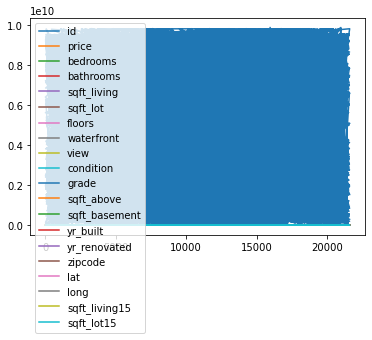

In [126]:
data.plot();
# tak, bardzo czytelnie. No więc można plotować cały dataframe ale, jak widać, może to nie przynieść pożądanych rezultatów

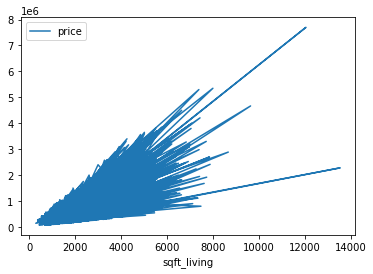

In [127]:
data.plot(x='sqft_living', y='price');
# lepiej, ale dalej nie o to chodziło. Może inny rodzaj wykresu?

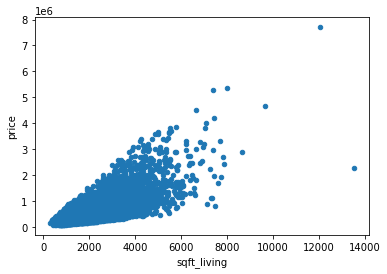

In [128]:
data.plot(x='sqft_living', y='price', kind='scatter');
# To już wygląda dobrze - można coś z tego odczytać. Metoda plot oferuje pewne funkcjonalności, ale żeby w pełni dopasować 
# wykres do potrzeb, polecam zaznajomić się z podstawami matplotliba (kolejny rozdział)

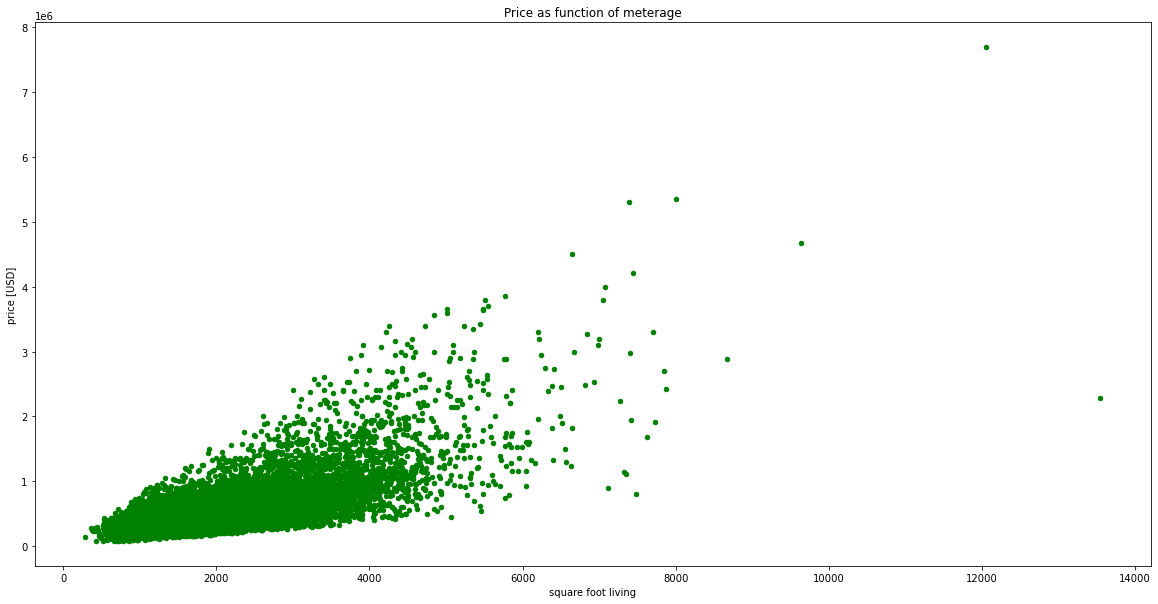

In [129]:
data.plot(x='sqft_living', y='price', kind='scatter', title='Price as function of meterage', 
          xlabel='square foot living', ylabel='price [USD]', color='green', figsize=(20, 10));
# Jak widać, funkcja plot przyjmuje wiele rozmaitych parametrów - najważniejszy jest parametr kind, który precyzuje rodzaj 
# wykresu jaki chcemy użyć. R E A D   T H E    D O C S 

Jest jeszcze jeden temat, o którym chciałbym wspomnieć. Często zdarza się tak, że dane które dostajemy są niepełne - brakuje pojedyńczych wartości w niektórych rekordach. To na tyle powszechny problem, że pandas dostarcza funkcje które pozwalają się z tym uporać. <br>
Pandas korzysta zarówno z wartości "NaN" z Numpy jak i "None" z Pythona do oznaczania brakującej wartości (coś jak NULL w SQL). Poniżej kilka przydatnych recept na uporanie się z brakującymi wartościami - oczywiście to, co z nimi zrobić (usunąć/zignorować-lepiej nie/ uzupełnic(jak?)) musisz ustalić sam, w zależności od specyfiki zadania.

In [144]:
# Dataset który wybrałem nie ma brakujących wartości, musimy więc go trochę popsuć
for _ in range(10000):
    random_column = random.choice(data.columns)
    random_row = random.randint(1, data.shape[0]-1)
    data.at[random_row, random_column] = None

data.isnull() # samo w sobie niezbyt użyteczne, ale...

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Can_I_afford_it
14136,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5603,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3294,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
15905,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
16928,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [146]:
data.isnull().sum() # Ten ciąg komend pozwala na zobaczenie ile mamy brakujących wartości w poszczególnych kolumnach
# Gdy zadecydujemy co z nimi zrobić, możemy użyć takich funkcji jak fillna() czy dropna()

id                 1917
date               1929
price              1911
bedrooms           1939
bathrooms          1916
sqft_living        1918
sqft_lot           1920
floors             1899
waterfront         1929
view               1927
condition          1921
grade              1940
sqft_above         1907
sqft_basement      1913
yr_built           1920
yr_renovated       1924
zipcode            1939
lat                1915
long               1882
sqft_living15      1921
sqft_lot15         1919
Can_I_afford_it    1938
dtype: int64

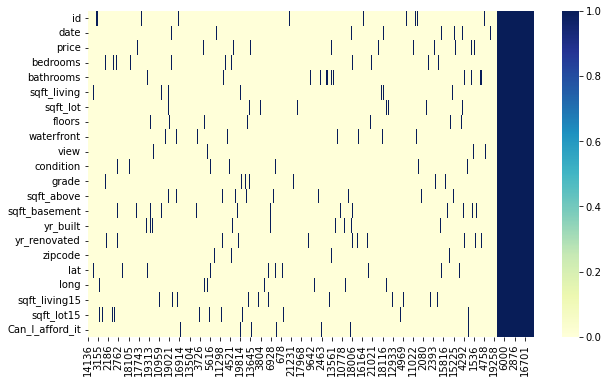

In [153]:
# Odbiegając trochę od pandas, przydatny przepis na wizualizację brakujących danych, ułatwiający podjęcie decyzji co robić dalej
import seaborn as sns

plt.figure(figsize=(10,6));
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu");

In [147]:
# Funkcja wyliczająca podstawowe statystyki dla dataframe
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.693700e+04,1.694300e+04,16915.000000,16938.000000,16936.000000,1.693400e+04,16955.000000,16925.000000,16927.000000,16933.000000,16914.000000,16947.000000,16941.000000,16934.000000,16930.000000,16915.000000,16939.000000,16972.000000,16933.000000,16935.000000
mean,4.572720e+09,5.406711e+05,3.367248,2.117000,2077.193966,1.512320e+04,1.494928,0.007445,0.233473,3.408374,7.657798,1787.971086,290.337760,1971.251152,85.003367,98077.857227,47.560466,-122.214038,1985.130810,12754.579037
std,2.877621e+09,3.651427e+05,0.937400,0.769981,916.931609,4.221226e+04,0.541733,0.085963,0.763833,0.648878,1.174266,825.381261,442.800436,29.241302,403.062993,53.592808,0.138732,0.140440,686.260485,27170.908351
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.115510e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1480.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.598000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.231000,1840.000000,7614.000000
75%,7.305301e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.071325e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678400,-122.124000,2360.000000,10095.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [155]:
# Pandas udostępnia funckję groupby - działającą bardzo podobnie do jej odpowiednika w SQL - czyli grupujemy po zadanym indeksie
# a następnie wykonujemy jakąś funkcję agregacyjną na tak otrzymanym obiekcie
data.groupby(by='condition').describe()

id                                                        \
             count          mean           std         min           25%   
condition                                                                  
1.0           21.0  4.877679e+09  3.165848e+09  40000362.0  2.570600e+09   
2.0          125.0  3.941863e+09  2.716722e+09   7200080.0  1.796100e+09   
3.0        10814.0  4.626272e+09  2.901885e+09   1000102.0  2.124054e+09   
4.0         4325.0  4.440713e+09  2.813933e+09   1200019.0  2.025701e+09   
5.0         1303.0  4.518380e+09  2.849632e+09  16000545.0  2.141316e+09   

                                                       price                 \
                    50%           75%           max    count           mean   
condition                                                                     
1.0        4.006000e+09  7.936500e+09  9.808700e+09     22.0  341681.818182   
2.0        3.332000e+09  6.205500e+09  9.558800e+09    125.0  337538.424000   
3.0        3.945250e+09  7.435913e+09  9.900000e+09  10809.0  542497.475530   
4.0        3.867400e+09  7.204200e+09  9.842301e+09   4340.0  522810.101843   
5.0        3.810000e+09  7.129303e+09  9.842300e+09   1301.0  608320.599539   

           ... sqft_living15         sqft_lot15                              \
           ...           75%     max      count          mean           std   
condition  ...                                                                
1.0        ...        1870.0  2850.0       22.0  10313.772727   6486.831150   
2.0        ...        1890.0  3890.0      124.0  18577.362903  37720.307773   
3.0        ...        2450.0  6210.0    10826.0  12536.196749  28635.534709   
4.0        ...        2210.0  5600.0     4313.0  13765.910735  25476.764764   
5.0        ...        2150.0  4440.0     1301.0  11152.445042  20943.829300   

                                                       
              min      25%     50%      75%       max  
condition                                              
1.0        3621.0  6582.75  8492.0  11270.5   30847.0  
2.0        1138.0  6218.75  7980.5  10983.0  217800.0  
3.0         651.0  4848.00  7245.0   9756.5  871200.0  
4.0        1173.0  6350.00  8400.0  11125.0  425581.0  
5.0        1099.0  5120.00  7440.0   9623.0  220232.0  

[5 rows x 152 columns]

In [158]:
data.groupby(by='condition').mean()['price']

condition
1.0    341681.818182
2.0    337538.424000
3.0    542497.475530
4.0    522810.101843
5.0    608320.599539
Name: price, dtype: float64

Przykładowe ćwiczenia: 

In [160]:
# a) Wybierz wiersze, w których pracownicy są starsi niż 30.
# b) Oblicz średnie wynagrodzenie dla mężczyzn i dla kobiet (użyj groupby)
# c) Posortuj według wieku malejąco.

ex1 = {'Name': ['John', 'Emma', 'Robert', 'Lily', 'David'],
        'Age': [28, 34, 29, 42, 36],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Salary': [50000, 65000, 48000, 70000, 55000],
        'Department': ['Sales', 'Marketing', 'Sales', 'Finance', 'Marketing']}
ex1 = pd.DataFrame(ex1)
ex1

,Name,Age,Gender,Salary,Department
0,John,28,Male,50000,Sales
1,Emma,34,Female,65000,Marketing
2,Robert,29,Male,48000,Sales
3,Lily,42,Female,70000,Finance
4,David,36,Male,55000,Marketing


In [163]:
# a) Dodaj nową kolumnę, która będie zawierać sumę wyników ze wszystkich przedmiotów dla każdego ucznia
# b) Oblicz średnią ocenę dla każdego przedmiotu dla każdego ucznia.
# c) Znajdź ucznia z najwyższym wynikiem sumarycznym.
# d) Posegreguj studentów po wyniku z matematyki, przyrody i angielskieog 

ex2 = {'Name': ['John', 'Emma', 'Robert', 'Lily', 'David'],
        'Math': [80, 90, 75, 85, 95],
        'Science': [70, 85, 80, 90, 65],
        'English': [90, 80, 75, 85, 95]}

ex2 = pd.DataFrame(ex2)
ex2

,Name,Math,Science,English
0,John,80,70,90
1,Emma,90,85,80
2,Robert,75,80,75
3,Lily,85,90,85
4,David,95,65,95


Dobre źródła żeby poczytać więcej:
   * dokumentacja biblioteki (Ś W I E T N A): https://pandas.pydata.org/docs/
   * książka twórcy Pandas: Python for Data Analysis auth. Wes McKinney
   * ChatGPT naprawdę dobrze sobie radzi z budowaniem działających, wydajnych fragmentów kodu i ich objaśnianiem

# Matplotlib - wykresy małe i duże

To będzie stosunkowo krótka sekcja, z dwóch powodów: większość potrzebnych nam wykresów jesteśmy w stanie stworzyć za pomocą jednej metody z biblioteki Pandas (która jednak pod spodem korzysta z matplotliba) oraz matplotlib dość łatwo pozwala tworzyć zadowalające wykresy, natomiast biblioteka jest tak rozbudowana, że poznanie całości zajęłoby wieki.

Podstawy matplotliba warto znać chociazby z tego powodu, że inne biblioteki wyższego poziomu służące do wizualizacji (np. seaborn) są na nim oparte.

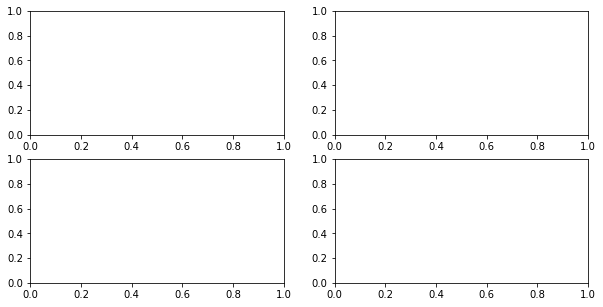

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

Co się wydarzyło?

Stworzyliśmy dwa główne rodzaje obiektów, które matplotlib wykorzystuje. Obiekt figure gromadzi w sobie wszystkie inne elementy związane z wizualizacją - np. wykresy, tytuły, legendy itp., natomiast obiekt Axes gromadzi informacje dotyczące pojedyńczego wykresu.

Pod spodem został tutaj użyty poznany już mechanizm rozpakowania tuple - plt.subplots zwraca wynik w postacie (figure, axes/axes array) - w tym przypadku było to (figure, axes array) ponieważ podaliśmy parametry, mówiące że chcemy mieć 4 podwykresy (2 na 2).

Zobaczmy jak dostać się do każdego z tych wykresów i jak zmodyfikować całość.

Numerujemy od 0:)


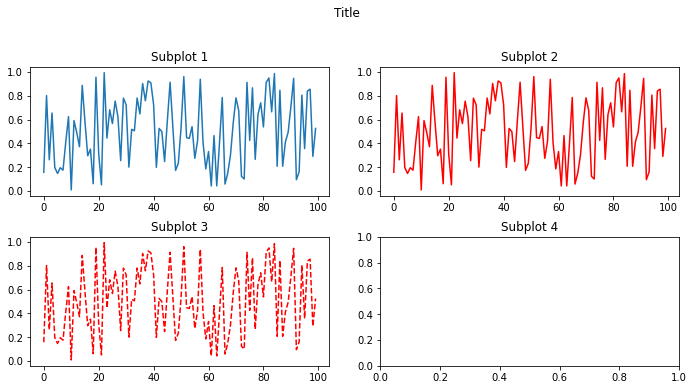

In [45]:
x_plot_data = np.arange(0, 100, 1)
y_plot_data = np.random.rand(10, 10).flatten()

# Po co pisac "_=ax.plot..."" ? funkcja plot zwraca informacje o wygenerowanym obiekcie, a jupyter notebook automatycznie to 
# printuje - chyba, że przechwycimy to w jakąś zmienną. Chwytliwa nazwa zmiennej "_" to konwencja - mówi tyle, że ta zmienna 
# nie będzie nigdzie wykorzystywana. Ostatni wykres zostawiam bez tego, żebyś zobaczył/a co mam na mysli.
# Jeżeli robimy tylko jeden plot w komórce, to wystarczy dać ";" na końcu - efekt będzie ten sam.

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.tight_layout(pad=2) # ustawianie odstepu pomiedzy poszczegolnymi subplotami

# plotting
_ = ax[0, 0].plot(x_plot_data, y_plot_data) 
_ = ax[0, 1].plot(x_plot_data, y_plot_data, color='red')
ax[1, 0].plot(x_plot_data, y_plot_data, color='red', linestyle='--')

# labeling
_ = fig.suptitle("Title", y=1.1)
_ = ax[0, 0].set_title("Subplot 1")
_ = ax[0, 1].set_title("Subplot 2")
_ = ax[1, 0].set_title("Subplot 3")
_ = ax[1, 1].set_title("Subplot 4")

try:
    ax[2, 0].plot(x_plot_data, y_plot_data, color='red', linestyle='--')
except IndexError:
    print("Numerujemy od 0:)")

<b> UWAGA </b> Axes != Axis . 
Axes to obiekt zawierający obszar do plotowania, SKŁADAJĄCY się  m.in. (w przypadku 2D) z dwóch obiektów Axis - czyli osi. Obiekt Axis nie robi zbyt wiele prawdę mówiac, zajmuje się formatowaniem ticków (skalowaniem) na osiach i podpisem przy osi. Obiekt Axes natomiast, robi niemalże wszystko.

Przedstawione wyżej podejście do plotowania jest dość obiektowe - alternatywą jest zwyczajne wywoływanie funkcji plot i poleganie na wewnętrznych mechanizmach maptlotlib do zarządzania figure i axis. Poniżej przykład

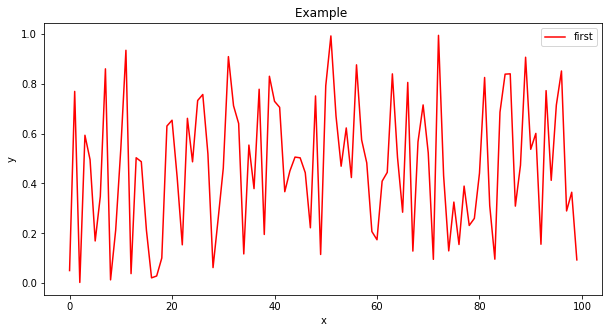

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(x_plot_data, y_plot_data, label='first', color='red', linestyle='-');
plt.title("Example ");
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

Oczywiście drugie podejście jest szybsze i zajmuje mniej miejsca, a często jesteśmy w stanie wygenerować taki wykres bez korzystania z matplotliba bezpośrednio, a jedynie przez bibliotekę Pandas. Za dokumentacją matplotliba: 

"In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project." 

czyli dość klasycznie - jeżeli plot ma być skomplikowany, dopieszczony i potencjalnie wykorzystywany w przyszłosci - wybieramy podejście obiektowe - w 90% przypadków pracy z danymi (a przynajmniej na zajęciach na uczelni) wystarczy nam podejście funkcyjne.

##  Ćwiczenia
Wygeneruj rezultat zbliżony do tych poniżej.

In [26]:
# Bar plot data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 50]

# Multiple plots data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y4 = np.log(x + 1)


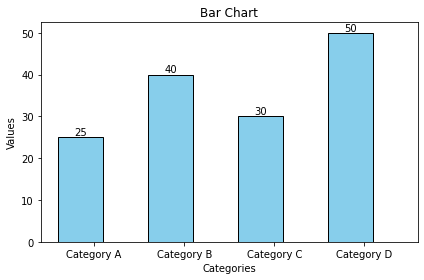

In [14]:
# ex1

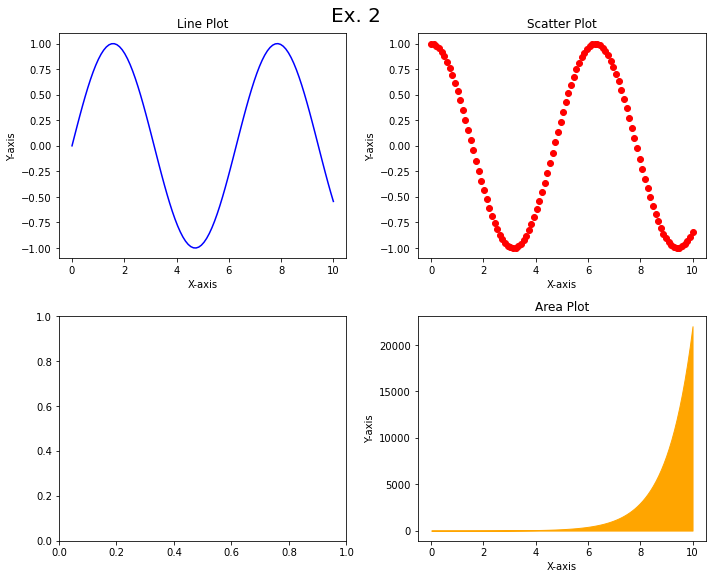

In [25]:
# ex2 

# Rozwiązanie

In [ ]:
# Matplotlib - ex1

# # Data
# categories = ['Category A', 'Category B', 'Category C', 'Category D']
# values = [25, 40, 30, 50]

# # Create a figure and axes
# fig, ax = plt.subplots()

# # Plot the data
# bars = ax.bar(categories, values)

# # Customize the appearance of the bars
# bar_color = 'skyblue'
# bar_width = 0.5
# bar_edge_color = 'black'
# for bar in bars:
#     _ = bar.set_color(bar_color)
#     _ = bar.set_width(bar_width)
#     _ = bar.set_edgecolor(bar_edge_color)

# # Add labels to the x-axis, y-axis, and chart title
# _ = ax.set_xlabel('Categories')
# _ = ax.set_ylabel('Values')
# _ = ax.set_title('Bar Chart')

# # Display the value of each bar on top of the bar
# for bar in bars:
#     height = bar.get_height()
#     _ = ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# # Adjust the layout to avoid cutting off labels
# plt.tight_layout()

# # Display the chart
# plt.show()

# Matplotlib - ex2

# Generate data
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y4 = np.log(x + 1)

# # Create a figure with subplots
# fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# # Plot 1: Line plot
# _ =axes[0, 0].plot(x, y1, color='blue')
# _ =axes[0, 0].set_xlabel('X-axis')
# _ =axes[0, 0].set_ylabel('Y-axis')
# _ =axes[0, 0].set_title('Line Plot')

# # Plot 2: Scatter plot
# _ =axes[0, 1].scatter(x, y2, color='red', marker='o')
# _ =axes[0, 1].set_xlabel('X-axis')
# _ =axes[0, 1].set_ylabel('Y-axis')
# _ =axes[0, 1].set_title('Scatter Plot')

# # Plot 4: Area plot
# _ =axes[1, 1].fill_between(x, y3, color='orange')
# _ =axes[1, 1].set_xlabel('X-axis')
# _ =axes[1, 1].set_ylabel('Y-axis')
# _ =axes[1, 1].set_title('Area Plot')

# # Adjust layout and spacing
# plt.tight_layout()

# # Display the figure
# _ = fig.suptitle("Ex. 2", fontsize=20, y=1)
# plt.show()